# Mathematical Modelling Of Chikungunya Outbreak In Southeast Brazil

# Modelling human population

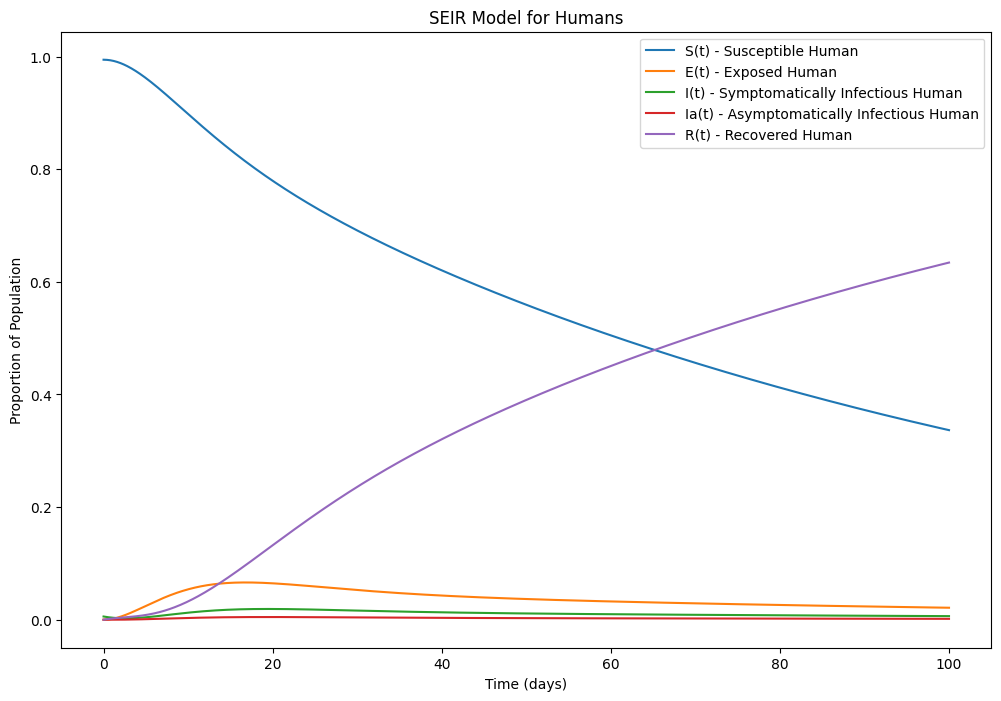

Reproduction number (Ro): 1.8524990886808066


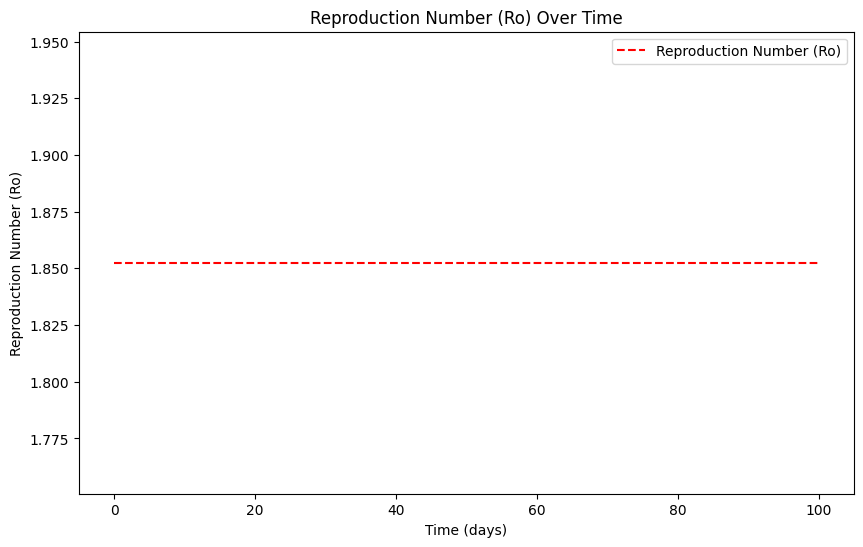

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the parameters for the model
βh = 0.1  # Rate at which humans get infected
βm = 0.562 # Rate at which humans get infected
λh= 0.17  # Duration of human latent period of infection
λm = 0.17 # Duration of mosquito latent period of infection
α = 0.464  # Recovery rate
μo = 0.05  # Mosquito birth rate
μ = 0.03  # Mosquito death rate
ϕ = 0.8  # Fraction of infections that are symptomatic

# Set the initial conditions for the model
S0 = 0.9943  # Initial proportion of susceptible humans
E0 = 0  # Initial proportion of exposed humans
I0 = 0.0057  # Initial proportion of symptomatically infectious humans
Ia0 = 0  # Initial proportion of asymptomatically infectious humans
R0 = 0  # Initial proportion of recovered humans

X0 = 0.99  # Initial proportion of susceptible mosquitoes
Y0 = 0.01  # Initial proportion of exposed mosquitoes
Z0 = 0  # Initial proportion of infectious mosquitoes

# Define the time vector
t = np.linspace(0, 100, 1000)

# Define the SEIR model equations
def model(y, t):
    S, E, I, Ia, R, X, Y, Z = y

    # Calculate the rate of change of each population group
    dSdt = -βh * S * Z
    dEdt = βh * S * Z - λh * E
    dIdt = ϕ * λh * E - α * I
    dIadt = (1 - ϕ) * λh * E - α * Ia
    dRdt = α * (I + Ia)

    dXdt = μo - μ * X - βh * S * X
    dYdt = βh * S * X - λh * Y
    dZdt = μ * X + λh * Y - α * Z

    return [dSdt, dEdt, dIdt, dIadt, dRdt, dXdt, dYdt, dZdt]

# Set the initial conditions vector
y0 = [S0, E0, I0, Ia0, R0, X0, Y0, Z0]

# Solve the SEIR equations over the time grid
solution = odeint(model, y0, t)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t, solution[:, 0], label='S(t) - Susceptible Human')
plt.plot(t, solution[:, 1], label='E(t) - Exposed Human')
plt.plot(t, solution[:, 2], label='I(t) - Symptomatically Infectious Human')
plt.plot(t, solution[:, 3], label='Ia(t) - Asymptomatically Infectious Human')
plt.plot(t, solution[:, 4], label='R(t) - Recovered Human')

plt.title('SEIR Model for Humans')
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.legend()
plt.show()

# Calculate the basic reproduction number (Ro)
Ro = np.sqrt((βh * βm * λm) / (μ * α * (μ + λm)))
print(f"Reproduction number (Ro): {Ro}")

# Plot the basic reproduction number (Ro) over time
plt.figure(figsize=(10, 6))
plt.plot(t, Ro * np.ones_like(t), 'r--', label='Reproduction Number (Ro)')
plt.title('Reproduction Number (Ro) Over Time')
plt.xlabel('Time (days)')
plt.ylabel('Reproduction Number (Ro)')
plt.legend()
plt.show()


# Modelling Intervention Strategy (fogging action) 

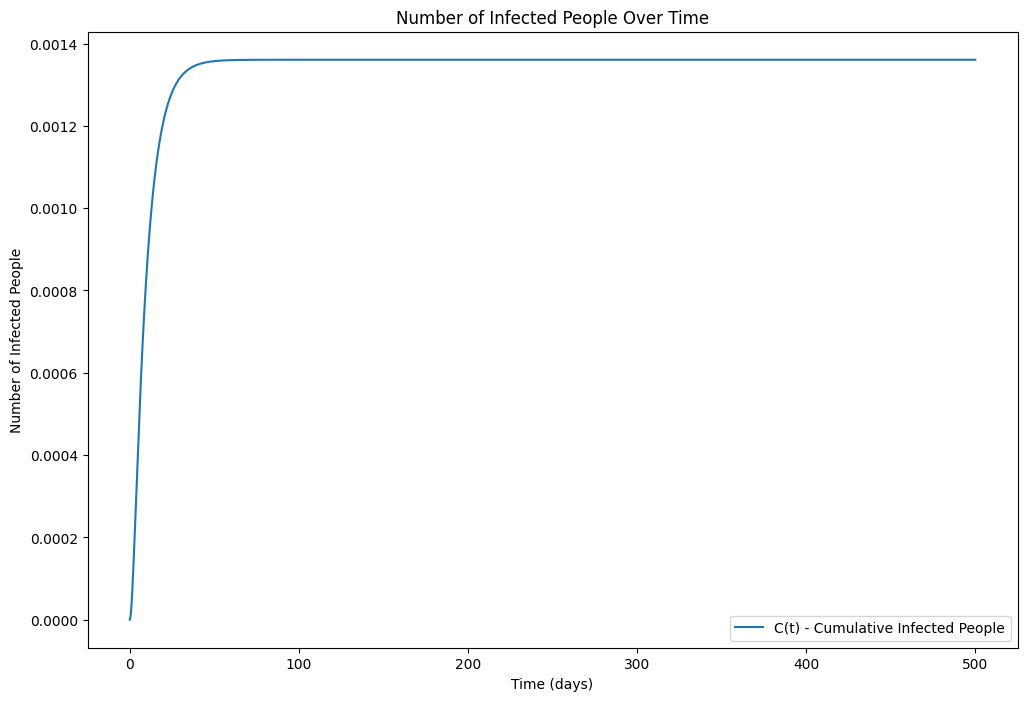

Reproduction Number (Ro): 1.6267055328049957


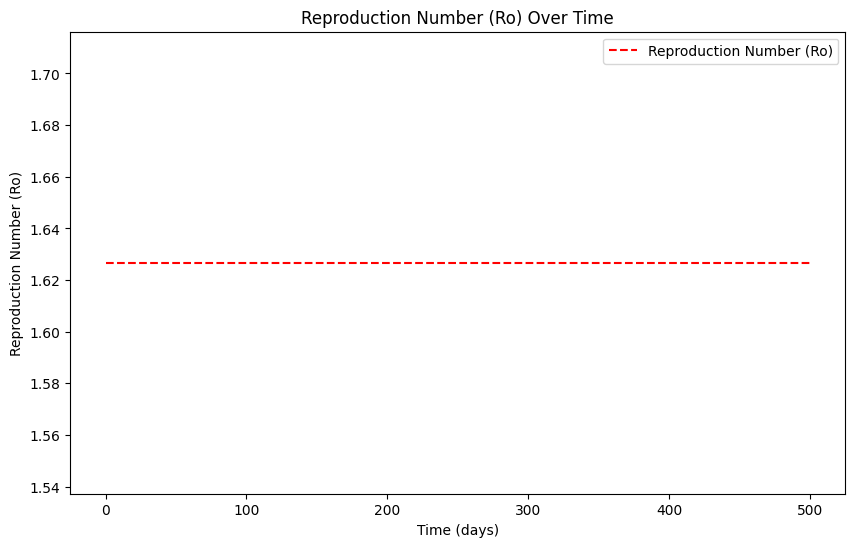

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the parameters for the model
βh = 0.1  # Rate at which humans get infected
λh = 0.17  # Duration of human latent period of infection
α = 0.464  # Recovery rate
μo = 0.05  # Mosquito birth rate
ϕ = 0.9  # Fraction of infections that are symptomatic
Cp = 0.3   # Threshold for fogging intervention (30% of total cases)
C =1      #cummulative population

# Fogging intervention parameters
ω = 0.25  # Parameter related to the intensity of the fogging action
θ = lambda x: 1 if x >= Cp else 0  # Unitary step function

# Set the initial conditions for the model
S0 = 0.9943  # Initial proportion of susceptible humans
E0 = 0  # Initial proportion of exposed humans
I0 = 0.0057  # Initial proportion of symptomatically infectious humans
Ia0 = 0  # Initial proportion of asymptomatically infectious humans
R0 = 0  # Initial proportion of recovered humans

# Define the time vector
t = np.linspace(0, 500, 1000)

μ= μo * (1 - ω * θ(C - Cp))  # Dynamic mosquito death rate considering fogging intervention

# Define the SEIR model equations with fogging intervention and dynamic μ
def model(y, t):
    S, E, I, Ia, R, C = y
    dSdt = -βh * S * I
    dEdt = βh * S * I - λh * E
    dIdt = ϕ * λh * E - α * I
    dIadt = (1 - ϕ) * λh * E - α * Ia
    dRdt = α * (I + Ia)
    dCdt = ϕ * λh * E  # Cumulative number of infected people

    return [dSdt, dEdt, dIdt, dIadt, dRdt, dCdt]

# Set the initial conditions vector
y0 = [S0, E0, I0, Ia0, R0, 0]

# Solve the SEIR equations over the time grid
solution = odeint(model, y0, t)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t, solution[:, 5], label='C(t) - Cumulative Infected People')

plt.title('Number of Infected People Over Time')
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected People')
plt.legend()
plt.show()

# Calculate the basic reproduction number (Ro)
Ro = np.sqrt((βh * βm * λm) / (μ * α * (μ + λm)))  # Updated formula for Ro
print(f"Reproduction Number (Ro): {Ro}")

# Plot the basic reproduction number (Ro) over time
plt.figure(figsize=(10, 6))
plt.plot(t, Ro * np.ones_like(t), 'r--', label='Reproduction Number (Ro)')
plt.title('Reproduction Number (Ro) Over Time')
plt.xlabel('Time (days)')
plt.ylabel('Reproduction Number (Ro)')
plt.legend()
plt.show()


# Modelling Mosquito Population

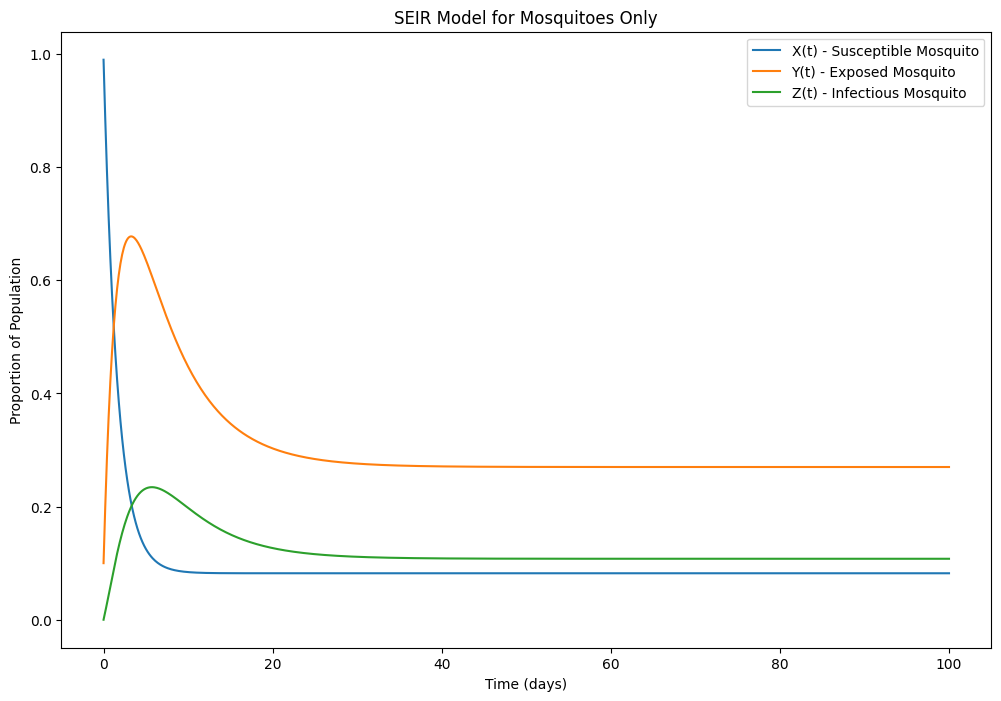

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the parameters
βh = 0.1  # Rate of human infection
βm= 0.562  # Rate of mosquito infection
λh = 0.17  # Latency period for humans
λm= 0.17   # Latency period for mosquitoes
α = 0.464  # Recovery rate
μo = 0.05  # Birth rate of mosquitoes
μ = 0.05   # Death rate of mosquitoes
ϕ = 0.8  # Proportion of symptomatic infections

# Set the initial conditions
S0 = 0.9943   # Initial proportion of susceptible humans
E0 = 0   # Initial proportion of exposed humans
I0 = 0.0057  # Initial proportion of symptomatic infectious humans
Ia0 = 0 # Initial proportion of asymptomatic infectious humans
R0 = 0  # Initial proportion of recovered humans

X0 = 0.99  # Initial proportion of susceptible mosquitoes
Y0 = 0.1   # Initial proportion of exposed mosquitoes
Z0 = 0  # Initial proportion of infectious mosquitoes

# Define the time vector
t = np.linspace(0, 100, 1000)

# Define the SEIR model for mosquitoes
def model_mosquito(y, t):
    X, Y, Z = y

    dXdt = μo - μ * X - βm * S0 * X
    dYdt = βm * S0 * X - λm * Y
    dZdt = μ * X + λm * Y - α * Z

    return [dXdt, dYdt, dZdt]

# Set the initial conditions for mosquitoes
y0_mosquito = [X0, Y0, Z0]

# Solve the SEIR equations for mosquitoes
solution_mosquito = odeint(model_mosquito, y0_mosquito, t)

# Plot the results for mosquitoes
plt.figure(figsize=(12, 8))
plt.plot(t, solution_mosquito[:, 0], label='X(t) - Susceptible Mosquito')
plt.plot(t, solution_mosquito[:, 1], label='Y(t) - Exposed Mosquito')
plt.plot(t, solution_mosquito[:, 2], label='Z(t) - Infectious Mosquito')

plt.title('SEIR Model for Mosquitoes Only')
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.legend()
plt.show()
